# "Linear Model with Pytorch"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Python, BDA]
- image: images/gradient_descent.gif

# Packages

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Data

`-` model : $y_i = \beta_0 + \beta_1 x_i + \epsilon_i \to w_0 + w_1 x_i + \epsilon_i$

`-` model : ${\bf y} = {\bf X}{\bf W} + \boldsymbol{\epsilon}$

`-` ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \dots \\ \epsilon_n\end{bmatrix}$

In [38]:
n = 100
ones = torch.ones(n)
x,_ = torch.randn(n).sort()

X = torch.vstack([ones, x]).T
W = torch.tensor([2.5, 4])
ϵ = torch.randn(n) * 0.5

y = X@W + ϵ
ytrue = X@W

In [34]:
y

tensor([-7.9254, -7.2846, -6.6988, -5.3959, -4.9642, -4.7078, -4.0894, -2.9930,
        -2.3942, -1.7454, -3.4303, -2.3827, -2.3087, -2.4119, -2.1397, -1.2018,
        -1.0087, -1.2137, -0.9966, -1.4436, -1.0670, -0.4035, -0.7238, -0.4093,
        -0.4892, -0.5167, -0.6416, -0.3774,  0.1593, -0.2544,  0.2295,  0.1423,
         0.2736,  1.0596,  1.2832,  0.6843,  0.6133,  1.2394,  1.2755,  0.2394,
         0.7692,  1.3112,  1.5886,  1.3820,  2.0761,  1.3800,  1.8351,  1.7022,
         2.5458,  1.7944,  1.2655,  1.8077,  2.2059,  2.9316,  2.5784,  2.9715,
         2.5274,  2.0825,  2.1534,  2.6146,  3.2631,  1.7419,  2.2964,  2.7733,
         4.5586,  2.4951,  3.8458,  3.8980,  3.2497,  3.9855,  2.8741,  3.2463,
         3.5336,  4.2413,  4.6400,  4.8920,  4.8734,  6.0103,  4.9590,  6.0903,
         5.2965,  5.2345,  5.4932,  5.9743,  6.4441,  6.3307,  6.7264,  7.5554,
         7.0148,  7.6583,  7.1105,  7.8448,  8.7719,  9.3451,  8.4065,  9.9763,
         9.3290, 10.4825, 10.8686, 14.09

C:\Users\user\anaconda3\envs\py39r40\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\py39r40\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


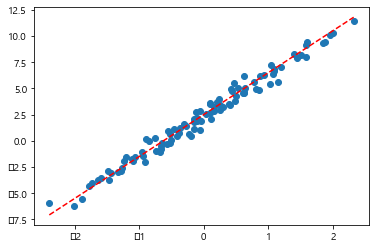

In [49]:
plt.plot(x, y, 'o')
plt.plot(x, ytrue, '--', color = "red")

# Learning

학습이란 ` Given data ` 를 이용하여 ` Parameter ` 를 추론하는 것이다.

위 그래프에서는 파란색 점으로 으로 빨간색 선 추론하는 것이 학습이다.

- Given data : $\big\{(x_i,y_i) \big\}_{i=1}^{n}$

- Parameter: ${\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$

- Estimated parameter: ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$

우선 임의로 $(\hat{w}_0, \hat{w}_1) = (-5, 10)$, 즉 $\hat{y}_i = -5 + 10x_i$ 을 선택하여 선을 그려보고 적절한지 판단해보자.

C:\Users\user\anaconda3\envs\py39r40\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\py39r40\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


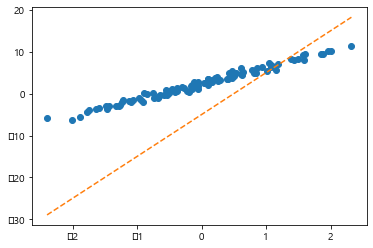

In [50]:
plt.plot(x, y, 'o')
plt.plot(x, -5+10*x, '--')

임의로 값을 선택하였으므로 당연히 적절하지 않다.

`경사하강법`을 사용하여 Parameter를 학습하여 적절한 회귀선을 구할 수 있다.

# Update Parameter

`1` Initial value : 임의의 선을 그린다.

In [53]:
What = torch.tensor([-5.0, 10.0], requires_grad=True) 

In [52]:
What

tensor([-5., 10.], requires_grad=True)

requires_grad=True는 추후 미분을 위한 옵션이다.